<a href="https://colab.research.google.com/github/aleks-haksly/VIZRO/blob/main/demos/heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install vizro -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.0/857.0 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.8/500.8 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.2 MB/s eta 0:00:00


In [4]:
WEEK_DAYS = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
}

In [5]:
from sqlalchemy import text
from sqlalchemy import create_engine
import pandas as pd
from google.colab import userdata


engine = create_engine(userdata.get("supabase"), client_encoding='utf8' )

def select(sql):
    sql = text(sql)
    return pd.read_sql(sql, engine)

In [6]:
df_2 = select("SELECT *, date_part('h', ds) as hour, count - lag(count, 1) OVER (partition by platform, weekday, date_part('h', ds) order by ds) as wow_diff FROM vizro.yandex_data_agg")

In [7]:
df_2['date'] = df_2["ds"].dt.date

In [8]:
import vizro.models as vm
import vizro.plotly.express as px

from vizro import Vizro

heatmap_tabbed = vm.Tabs(
    tabs=[vm.Container(
            title="Weekly queries count",
            components=[
            vm.Graph(
            id="Weekly queries count",
            figure=px.density_heatmap(data_frame=df_2[df_2.date > df_2.date.max() - pd.Timedelta(7, 'days')], x="date", y="hour", z="count", histfunc="sum", text_auto=True, nbinsy=24, nbinsx=7, facet_col="platform")
            )]),
            vm.Container(
            title="WoW difference",
            components=[
            vm.Graph(
            id="WoW difference",
            figure=px.density_heatmap(df_2[df_2.date > df_2.date.max() - pd.Timedelta(7, 'days')], x="date", y="hour", z="wow_diff", histfunc="sum", text_auto=True, nbinsy=24, nbinsx=7, color_continuous_scale=px.colors.diverging.RdBu, color_continuous_midpoint=0, facet_col='platform')
            )])
        ])

page = vm.Page(title="My page", components=[heatmap_tabbed])
dashboard = vm.Dashboard(pages=[page])
Vizro().build(dashboard).run()

<IPython.core.display.Javascript object>

In [9]:
!pip install prophet -q

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [11]:
from prophet import Prophet
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [12]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp609dv0r/qw_yoe20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp609dv0r/ybp22xc9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88699', 'data', 'file=/tmp/tmpp609dv0r/qw_yoe20.json', 'init=/tmp/tmpp609dv0r/ybp22xc9.json', 'output', 'file=/tmp/tmpp609dv0r/prophet_modelir7_priu/prophet_model-20250106173143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:31:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

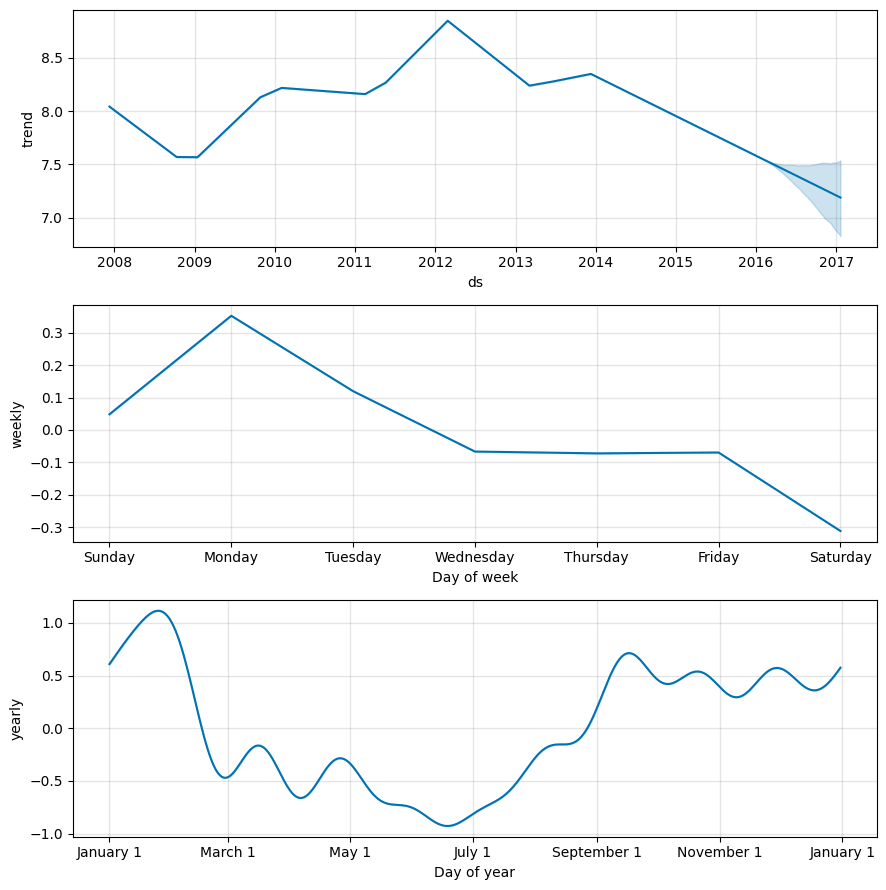

In [14]:
fig2 = m.plot_components(forecast)



In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041704,8.304914,9.520260,8.041704,8.041704,0.802946,0.802946,0.802946,0.352288,0.352288,0.352288,0.450658,0.450658,0.450658,0.0,0.0,0.0,8.844650
1,2007-12-11,8.040157,7.984555,9.217661,8.040157,8.040157,0.553024,0.553024,0.553024,0.119636,0.119636,0.119636,0.433389,0.433389,0.433389,0.0,0.0,0.0,8.593182
2,2007-12-12,8.038611,7.766721,9.022262,8.038611,8.038611,0.350386,0.350386,0.350386,-0.066669,-0.066669,-0.066669,0.417055,0.417055,0.417055,0.0,0.0,0.0,8.388997
3,2007-12-13,8.037064,7.749679,9.042804,8.037064,8.037064,0.329846,0.329846,0.329846,-0.072254,-0.072254,-0.072254,0.402100,0.402100,0.402100,0.0,0.0,0.0,8.366910
4,2007-12-14,8.035517,7.694538,8.943184,8.035517,8.035517,0.319356,0.319356,0.319356,-0.069575,-0.069575,-0.069575,0.388931,0.388931,0.388931,0.0,0.0,0.0,8.354874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.192173,7.442843,8.896468,6.838580,7.529111,1.017923,1.017923,1.017923,0.048287,0.048287,0.048287,0.969637,0.969637,0.969637,0.0,0.0,0.0,8.210097
3266,2017-01-16,7.191152,7.748205,9.242570,6.836124,7.530989,1.343970,1.343970,1.343970,0.352288,0.352288,0.352288,0.991681,0.991681,0.991681,0.0,0.0,0.0,8.535122
3267,2017-01-17,7.190131,7.580944,9.052997,6.833165,7.533157,1.132419,1.132419,1.132419,0.119636,0.119636,0.119636,1.012783,1.012783,1.012783,0.0,0.0,0.0,8.322549
3268,2017-01-18,7.189109,7.437917,8.793332,6.830206,7.535324,0.966069,0.966069,0.966069,-0.066669,-0.066669,-0.066669,1.032738,1.032738,1.032738,0.0,0.0,0.0,8.155179


In [21]:
fig = make_subplots(rows=3, cols=1, subplot_titles=["Trend", "Weekly Seasonality"])

In [23]:
# Тренд
fig.add_trace(
    go.Scatter(x=forecast['ds'], y=forecast['trend'], mode='lines', name='Trend'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=forecast['ds'][-100:], y=forecast['weekly'][-100:], mode='lines', name='Trend'),
    row=2, col=1
)

fig.add_trace(
        go.Scatter(x=forecast['ds'][-100:], y=forecast['yearly'][-100:], mode='lines', name='Yearly Seasonality'),
        row=3, col=1
    )
fig.update_layout(height=800, title="Prophet Components")
fig.show()